In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sales_2023.csv')
data.columns = data.columns.str.strip()
data.head()

,InvoiceNumber,Date,InvoiceType,NetAmount,PaymentMethod,CustomerName,CustomerMobileNumber,Address1,City,Pincode,State,Quantity,Description,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal
0,2366,01-01-2023,Sale,4700.02,Cash,JALLEL AHAMED,9985443756,THAKASHILA,ALAMPUR,509135,TELANGANA,1,TSH 2 D,3983.07,346.98,0,3983.07,4700.02
1,2367,01-01-2023,Sale,15040.00,Cash,B.P.VENKATA PRASAD,9160853916,VENKATADRI NAGAR,KURNOOL,518002,ANDHRA PRADESH,1,TSP 3,12745.76,0.00,0,12745.76,15040.00
2,2368,01-01-2023,Sale,14500.01,Cash,A.ISMAIL BASHA,7013054399,RAJOLI VILLAGE,RAJOLI,509126,TELANGANA,1,TSP 3,12288.14,540.00,0,12288.14,14500.01
3,2369,02-01-2023,Sale,14500.00,Cash,SHIVA,7288806482,KALLUR,KURNOOL,518002,ANDHRA PRADESH,1,TSP 3,12288.14,540.00,0,12288.14,14500.00
4,2370,02-01-2023,Sale,14850.01,Cash,RANGANATH,9000046788,ULCHALA ROAD,KURNOOL,518003,ANDHRA PRADESH,1,TSP 3,12584.75,190.00,0,12584.75,14850.01


EDA

In [3]:
data.isnull().sum()

InvoiceNumber           0
Date                    0
InvoiceType             0
NetAmount               0
PaymentMethod           0
CustomerName            0
CustomerMobileNumber    0
Address1                0
City                    0
Pincode                 0
State                   0
Quantity                0
Description             0
UnitPrice               0
Discount                0
PromotionalDiscount     0
BasicAmount             0
ItemTotal               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   InvoiceNumber         2893 non-null   int64  
 1   Date                  2893 non-null   object 
 2   InvoiceType           2893 non-null   object 
 3   NetAmount             2893 non-null   float64
 4   PaymentMethod         2893 non-null   object 
 5   CustomerName          2893 non-null   object 
 6   CustomerMobileNumber  2893 non-null   int64  
 7   Address1              2893 non-null   object 
 8   City                  2893 non-null   object 
 9   Pincode               2893 non-null   int64  
 10  State                 2893 non-null   object 
 11  Quantity              2893 non-null   int64  
 12  Description           2893 non-null   object 
 13  UnitPrice             2893 non-null   float64
 14  Discount              2893 non-null   float64
 15  PromotionalDiscount  

In [5]:
data.describe()

,InvoiceNumber,NetAmount,CustomerMobileNumber,Pincode,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal
count,2893.000000,2893.000000,2.893000e+03,2893.000000,2893.000000,2893.000000,2893.000000,2893.0,2893.000000,2893.000000
mean,1475.749395,19348.212133,9.094711e+09,517390.138610,1.093674,15847.361545,866.480474,0.0,16028.386360,18913.496212
std,913.417722,12205.121259,9.038746e+08,3623.563442,3.593332,8863.161760,1031.813624,0.0,9311.912924,10988.057484
min,1.000000,2900.010000,6.281119e+09,500003.000000,1.000000,53.390000,0.000000,0.0,2457.630000,2900.010000
25%,695.000000,14250.100000,8.792319e+09,518002.000000,1.000000,12033.920000,250.000000,0.0,12033.920000,14200.020000
50%,1411.000000,14900.000000,9.440716e+09,518003.000000,1.000000,12542.380000,540.000000,0.0,12542.470000,14800.110000
75%,2380.000000,20000.070000,9.703601e+09,518006.000000,1.000000,16525.680000,1050.930000,0.0,16610.180000,19600.020000
max,3098.000000,175329.000000,9.989966e+09,590127.000000,185.000000,63559.410000,13821.200000,0.0,101338.980000,119580.000000


Location-Based Demand Analysis


In [6]:
cities = data.groupby('City')['ItemTotal'].sum().sort_values(ascending=False)
states = data.groupby('State')['ItemTotal'].sum().sort_values(ascending=False)

In [7]:
print(cities)
print(states)

City
KURNOOL                   24089649.10
KURNOOL                   18574430.68
KURNOOL DIST               2625858.93
JOGULAMBA GADWALA DIST     1237690.78
RAJOLI                      451006.34
                             ...     
PAGIDALA                      6799.99
SALKAPURAM                    6511.00
SHANTHI NAGAR                 5047.00
ITIKAYAL                      4800.00
PRAGATUR                      4650.00
Name: ItemTotal, Length: 162, dtype: float64
State
ANDHRA PRADESH       48875475.81
TELANGANA             5672618.35
ARUNACHAL PRADESH      131980.27
KARNATAKA               36670.11
Name: ItemTotal, dtype: float64


In [8]:
pinncode = data.groupby('Pincode')['ItemTotal'].sum().sort_values(ascending=False)

In [9]:
print(pinncode)

Pincode
518003    17108885.25
518002    10140911.34
518004     3368945.26
518466     3168189.31
518001     2412610.73
             ...     
518390       11800.00
524201       11500.00
560010       11170.00
584140       10300.00
518523        6799.99
Name: ItemTotal, Length: 85, dtype: float64


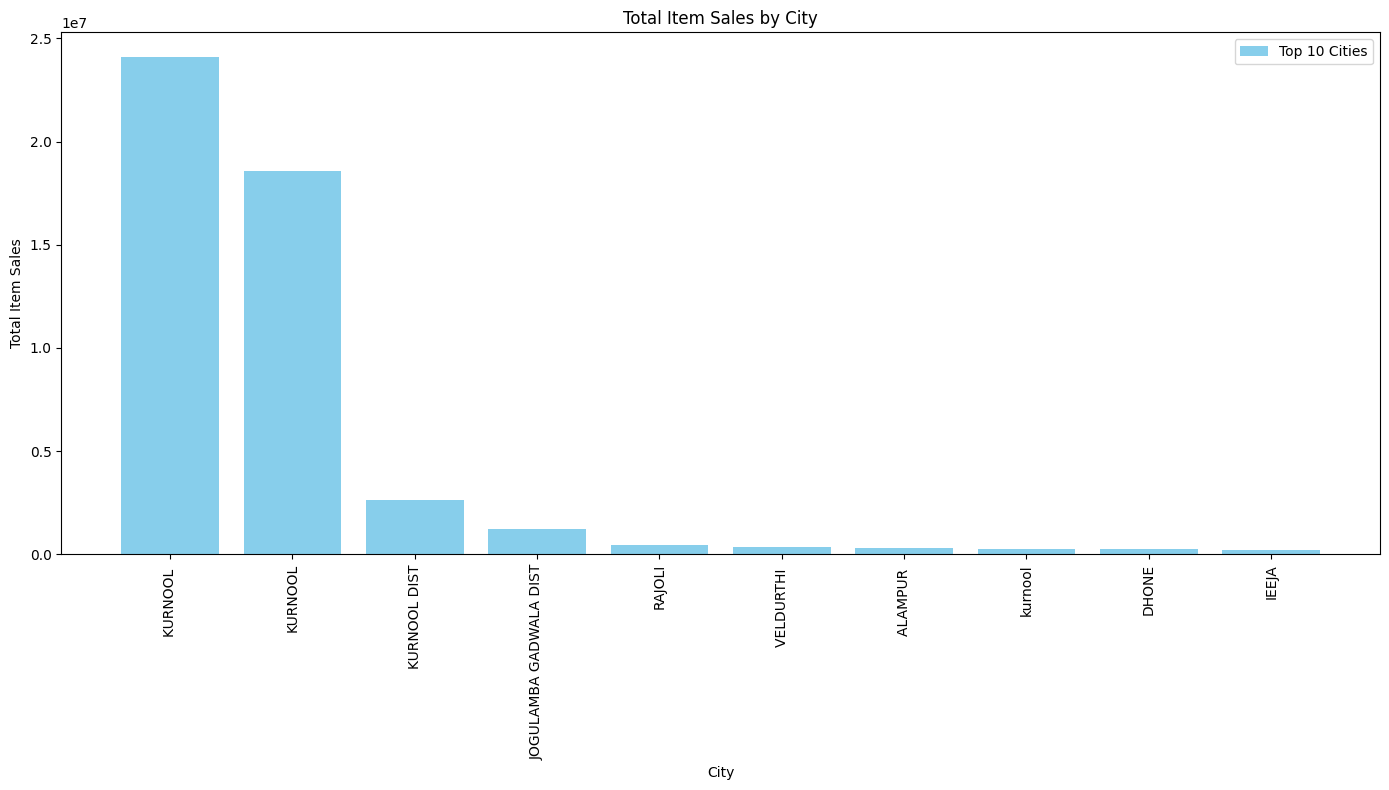

In [10]:
plt.figure(figsize=(14,8))
plt.bar(cities.index[:10], cities.values[:10], color='skyblue', label='Top 10 Cities')
plt.legend()
plt.xlabel('City')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

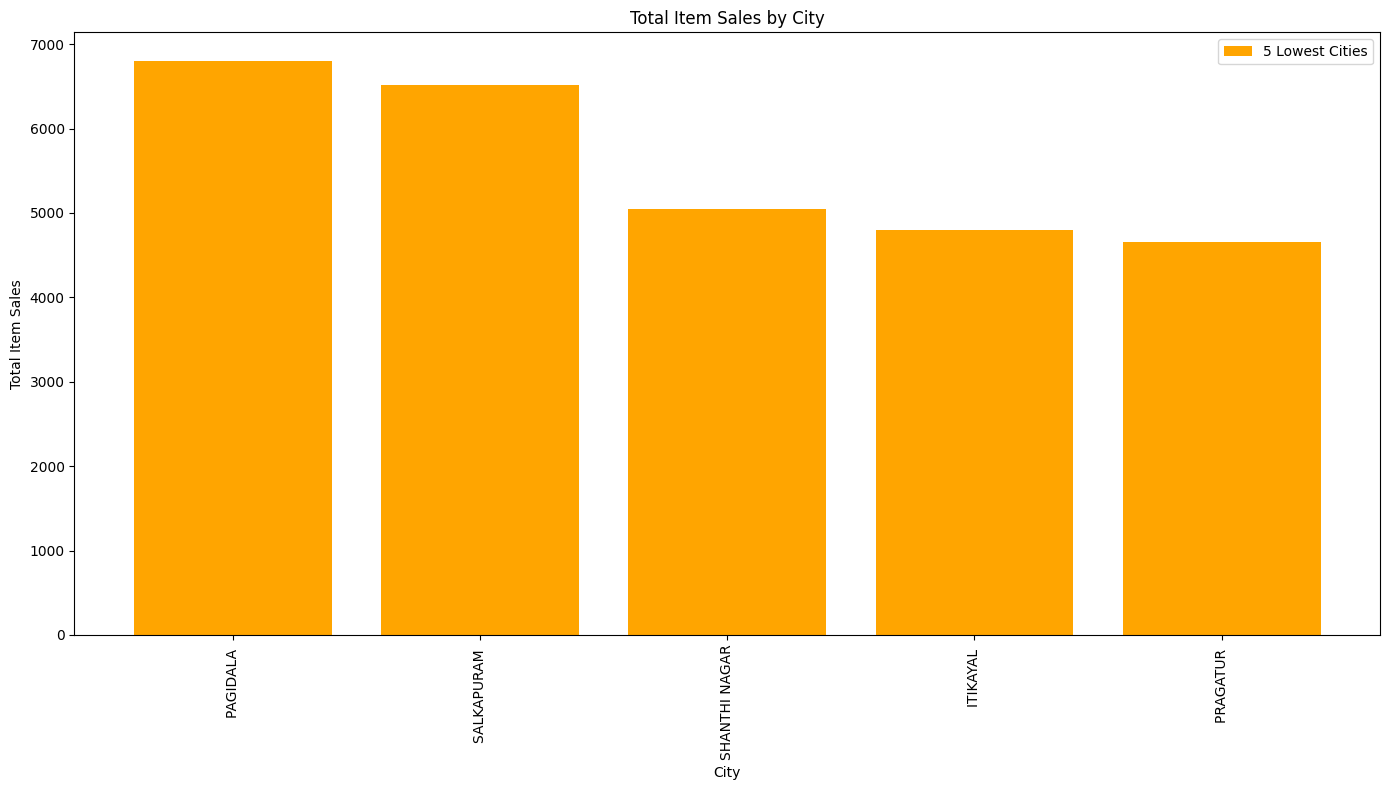

In [11]:
plt.figure(figsize=(14,8))
plt.bar(cities.index[-5:], cities.values[-5:], color='orange', label='5 Lowest Cities')
plt.legend()
plt.xlabel('City')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\96328267.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


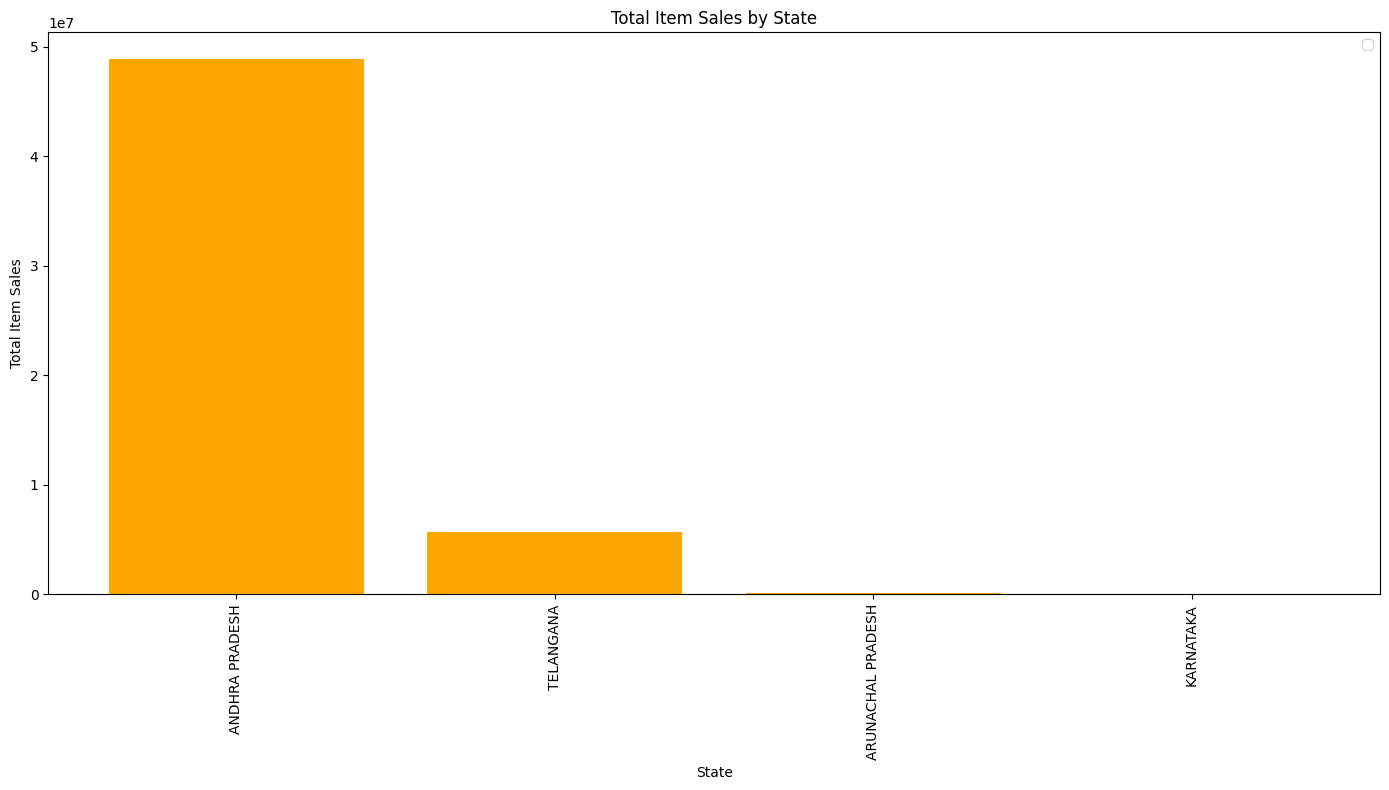

In [12]:
plt.figure(figsize=(14,8))
plt.bar(states.index, states.values, color='orange')
plt.legend()
plt.xlabel('State')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

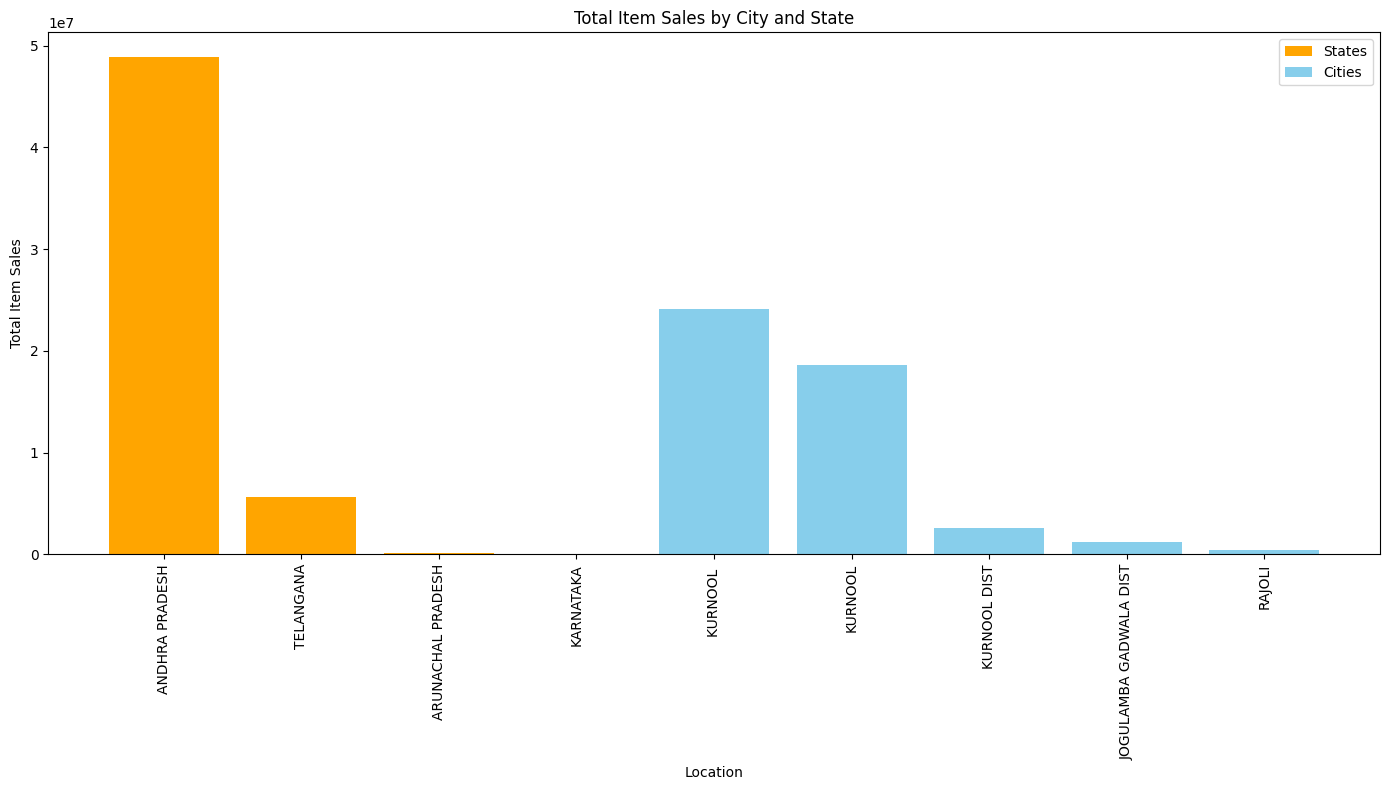

In [13]:
plt.figure(figsize=(14,8))
plt.bar(states.index, states.values, color='orange', label='States')
plt.bar(cities.index[:5], cities.values[:5], color='skyblue', label='Cities')
plt.legend()
plt.xlabel('Location')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City and State')
plt.xticks(rotation=90)
plt.savefig("state_citi.jpg")
plt.tight_layout()
plt.show()

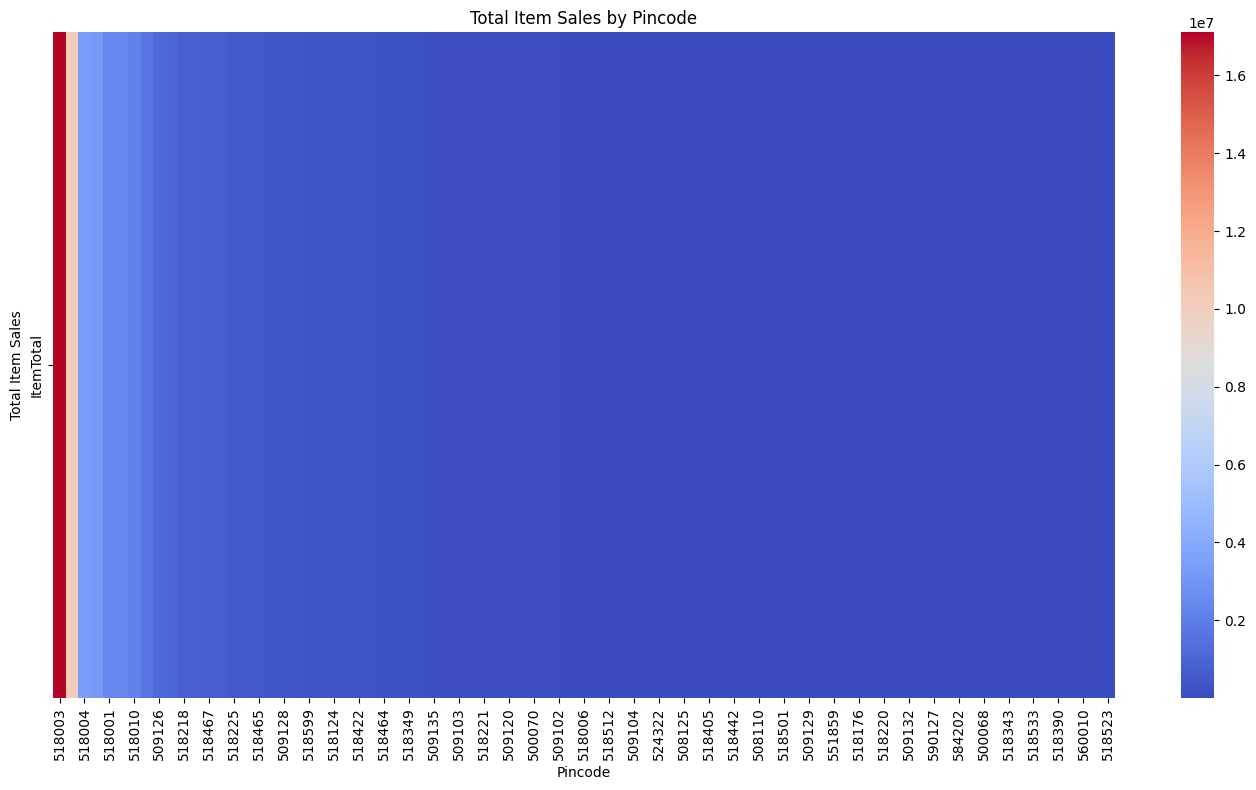

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(pinncode.to_frame().T, cmap='coolwarm', cbar=True)
plt.xlabel('Pincode')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by Pincode')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
data['CustomerName'] = data['CustomerName'].str.strip()

In [16]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [17]:
data.head(3)

,InvoiceNumber,Date,InvoiceType,NetAmount,PaymentMethod,CustomerName,CustomerMobileNumber,Address1,City,Pincode,State,Quantity,Description,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal
0,2366,2023-01-01,Sale,4700.02,Cash,JALLEL AHAMED,9985443756,THAKASHILA,ALAMPUR,509135,TELANGANA,1,TSH 2 D,3983.07,346.98,0,3983.07,4700.02
1,2367,2023-01-01,Sale,15040.00,Cash,B.P.VENKATA PRASAD,9160853916,VENKATADRI NAGAR,KURNOOL,518002,ANDHRA PRADESH,1,TSP 3,12745.76,0.00,0,12745.76,15040.00
2,2368,2023-01-01,Sale,14500.01,Cash,A.ISMAIL BASHA,7013054399,RAJOLI VILLAGE,RAJOLI,509126,TELANGANA,1,TSP 3,12288.14,540.00,0,12288.14,14500.01


In [ ]:
data['CustomerName'] = data['CustomerName'].astype(str)
data['CustomerMobileNumber'] = data['CustomerMobileNumber'].astype(str)

In [119]:
customer_df = data.groupby(['CustomerName', 'CustomerMobileNumber']).agg({
    'InvoiceNumber': 'count',                         # Frequency / Visits
    'NetAmount': 'sum',                               # Monetary
    'Date': ['min', 'max'],                           # Recency and First visit
    'City': pd.Series.mode,                           # Most frequent city
    'Description': lambda x: ', '.join(x.unique())    # Unique models
}).reset_index()

customer_df.columns = ['CustomerName', 'CustomerMobileNumber',
                       'Frequency', 'TotalSpend', 'FirstPurchase', 'LastPurchase',
                       'City', 'ModelsPurchased']

In [120]:
today = data['Date'].max()
customer_df['Recency'] = (today - customer_df['LastPurchase']).dt.days
customer_df['AvgSpend'] = customer_df['TotalSpend'] / customer_df['Frequency']
customer_df['TimeBetweenVisits'] = (customer_df['LastPurchase'] - customer_df['FirstPurchase']).dt.days


In [122]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'TotalSpend']])
scaled_df = pd.DataFrame(scaled, columns=['RecencyNorm', 'FrequencyNorm', 'MonetaryNorm'], index=customer_df.index)


In [123]:
customer_df['Score'] = (
    (1 - scaled_df['RecencyNorm']) * 0.4 +
    scaled_df['FrequencyNorm'] * 0.3 +
    scaled_df['MonetaryNorm'] * 0.3
)

In [124]:
def label_segment(row):
    if row['Frequency'] == 1:
        return "One-time Buyer"
    elif row['Score'] >= 0.8:
        return "VIP Customer"
    elif row['Score'] >= 0.5:
        return "Regular Customer"
    else:
        return "Location-focused"

In [125]:
customer_df['Segment'] = customer_df.apply(label_segment, axis=1)


In [139]:
import os

os.makedirs("outputs", exist_ok=True)
customer_df.to_csv("outputs/customer_segments_output_new_2023.csv")

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\314090606.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('piechart.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


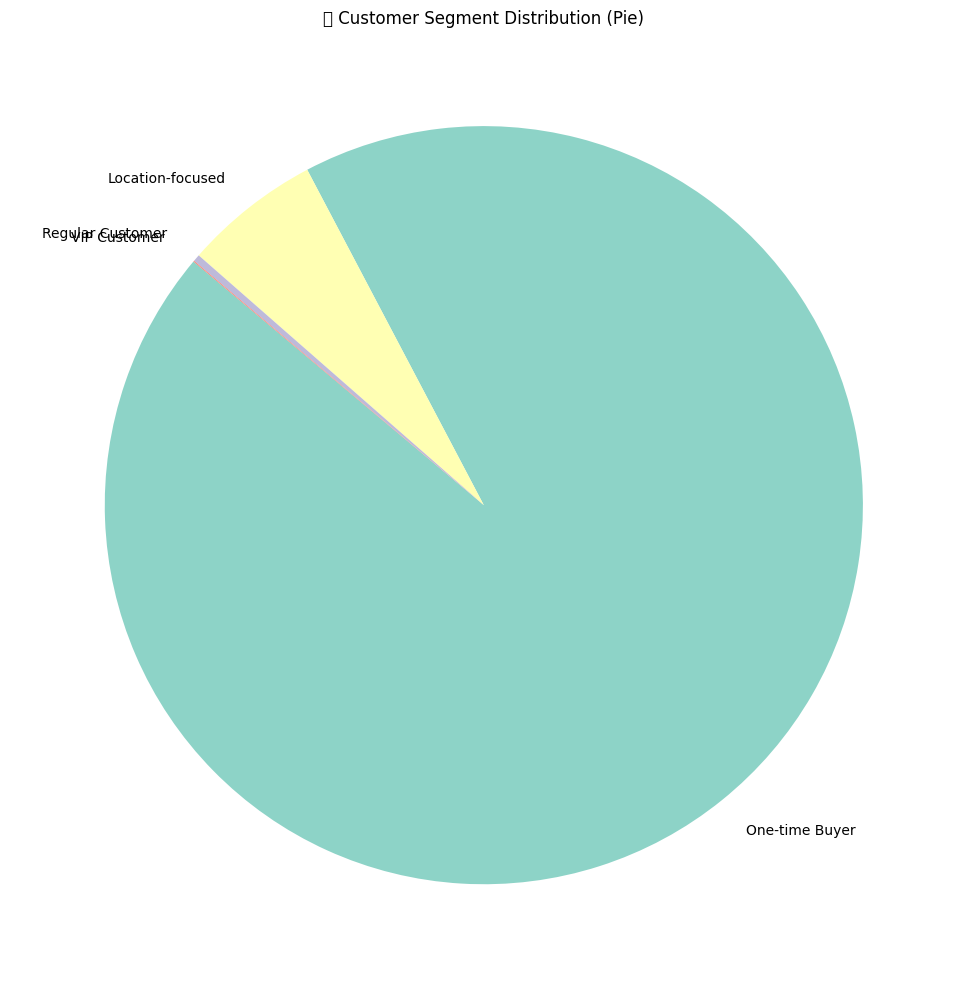

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\314090606.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\314090606.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('barchart.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


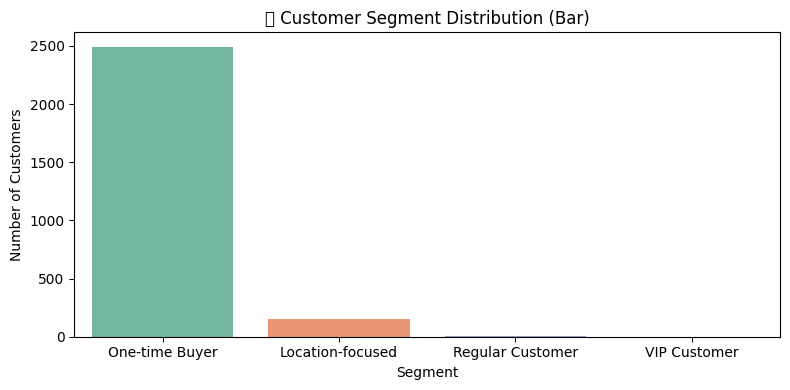

In [127]:
segment_counts = customer_df['Segment'].value_counts()

# Pie chart
plt.figure(figsize=(10,10))
segment_counts.plot.pie( startangle=140, colors=sns.color_palette('Set3'))
plt.title("📊 Customer Segment Distribution (Pie)")
plt.ylabel("")
plt.savefig('piechart.jpg')
plt.tight_layout()
plt.show()

# Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
plt.title("📊 Customer Segment Distribution (Bar)")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.savefig('barchart.jpg')
plt.tight_layout()
plt.show()

In [128]:
model_sales = data.groupby('Description')['NetAmount'].sum().sort_values(ascending=False)


In [129]:
print("\n🔢 Total Sales Value per Model:")
print(model_sales)


🔢 Total Sales Value per Model:
Description
TSP 3                                               18862207.86
TRF 518 HS + SF011-URC                               2853925.88
TRF 513 HS + SF007-URC                               2848842.74
TSP 2                                                1714435.54
TRF 710 HS + SF007-URC                               1379671.92
                                                       ...     
HCS 7025-R                                             10000.00
HCS 4025 S                                              7500.11
HCS 4025 SJ                                             7000.00
TSCP 007                                                6000.01
3 Core Flat 1.5 Sq.mm (1100V) ISI, Black (1000m)        3780.02
Name: NetAmount, Length: 177, dtype: float64


C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\867554590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_sales.head(10).values, y=model_sales.head(10).index, palette='coolwarm')


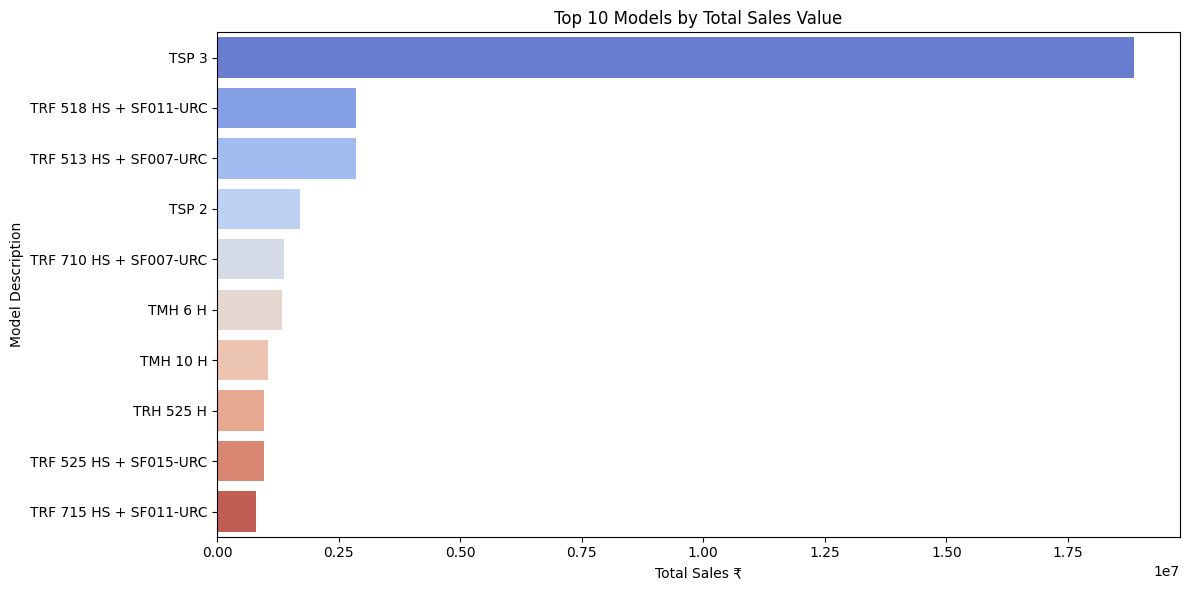

In [130]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_sales.head(10).values, y=model_sales.head(10).index, palette='coolwarm')
plt.title("Top 10 Models by Total Sales Value")
plt.xlabel("Total Sales ₹")
plt.savefig('ModelImage.jpg')
plt.ylabel("Model Description")
plt.tight_layout()
plt.show()

In [131]:
units_sold = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nUnits Sold per Model:")
print(units_sold)


Units Sold per Model:
Description
TSP 3                                             1288
3 Core Flat 4 Sq.mm (1100V) ISI, Black (1000m)     185
TRF 513 HS + SF007-URC                             166
TSP 2                                              144
TRF 518 HS + SF011-URC                             143
                                                  ... 
TRT 330 S + ST007                                    1
TSM 13 Z DOL                                         1
TVSM 3005 S                                          1
TW6 2015-075 6T037-C3642                             1
TW6 3020-075 6T075-C3642                             1
Name: Quantity, Length: 177, dtype: int64


C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\337574638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_sold.head(10).values, y=units_sold.head(10).index, palette='mako')


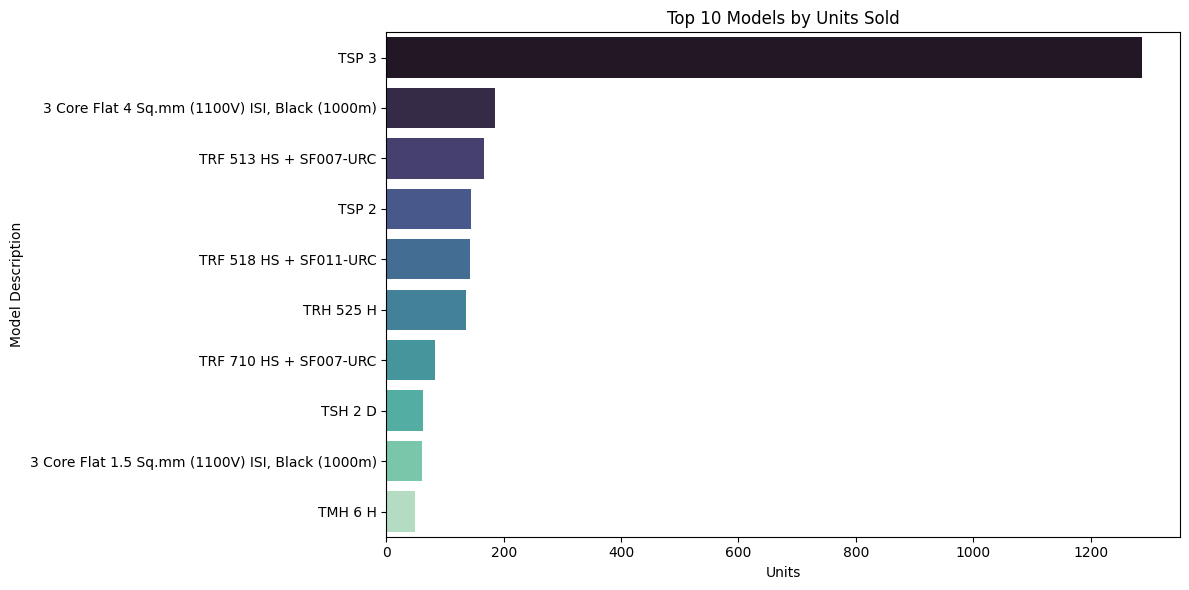

In [132]:
plt.figure(figsize=(12,6))
sns.barplot(x=units_sold.head(10).values, y=units_sold.head(10).index, palette='mako')
plt.title("Top 10 Models by Units Sold")
plt.xlabel("Units")
plt.ylabel("Model Description")
plt.savefig('unitssold.jpg')
plt.tight_layout()
plt.show()

In [133]:
model_city_sales = data.groupby(['Description', 'City'])['NetAmount'].sum().reset_index()
pivot_model_city = model_city_sales.pivot(index='Description', columns='City', values='NetAmount').fillna(0)


In [134]:
top_models = model_sales.head(10).index
top_cities = data['City'].value_counts().head(5).index
filtered_pivot = pivot_model_city.loc[top_models, top_cities]

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\666707358.py:6: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


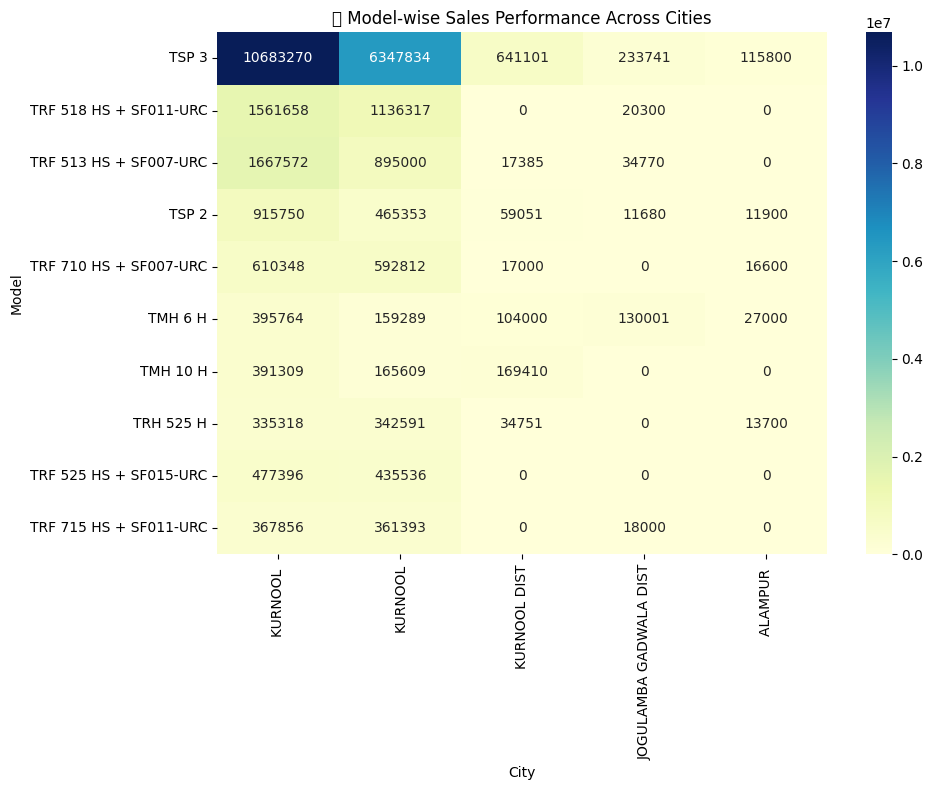

In [135]:
plt.figure(figsize=(10,8))
sns.heatmap(filtered_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📍 Model-wise Sales Performance Across Cities")
plt.xlabel("City")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\3740065485.py:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("heatmap of Unique Customers.jpg")
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


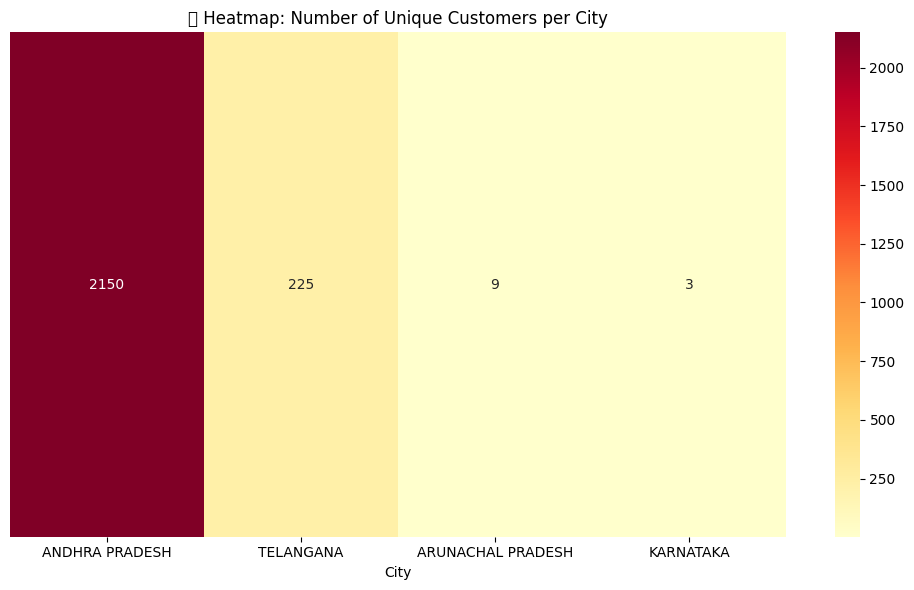

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\3740065485.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("heatmap of Sales per State.jpg")
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


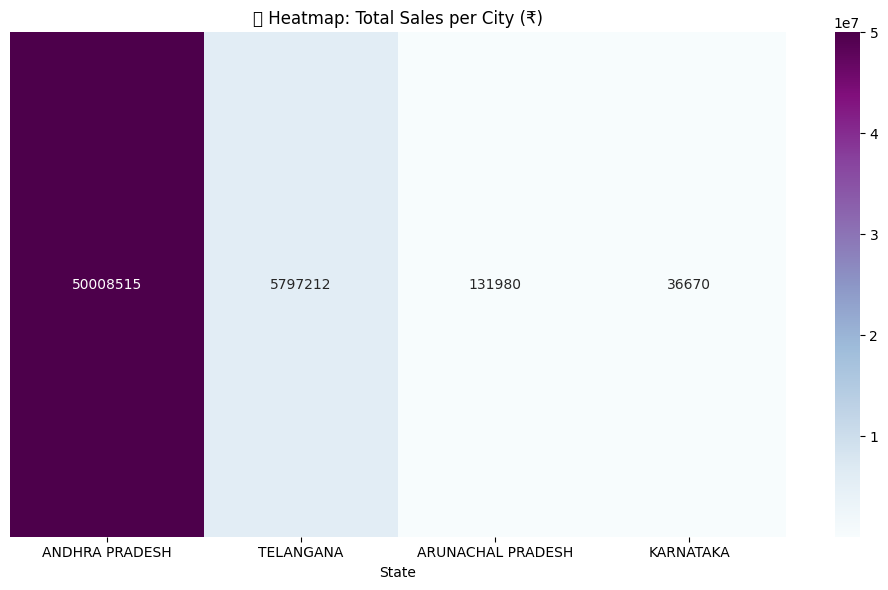

In [136]:
city_customer_counts = data.groupby('State')['CustomerName'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(city_customer_counts.to_frame().T, cmap='YlOrRd', annot=True, fmt='d')
plt.title("📍 Heatmap: Number of Unique Customers per City")
plt.yticks([])
plt.xlabel("City")
plt.savefig("heatmap of Unique Customers.jpg")
plt.tight_layout()
plt.show()

state_sales = data.groupby('State')['NetAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(state_sales.to_frame().T, cmap='BuPu', annot=True, fmt=".0f")
plt.title("📍 Heatmap: Total Sales per City (₹)")
plt.yticks([])
plt.xlabel("State")
plt.savefig("heatmap of Sales per State.jpg")
plt.tight_layout()
plt.show()


In [137]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


data['YearMonth'] = data['Date'].dt.to_period('M').astype(str) 

In [79]:
monthly_sales = data.groupby('YearMonth')['NetAmount'].sum().reset_index()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_25644\3854303556.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('Sales Per Month.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


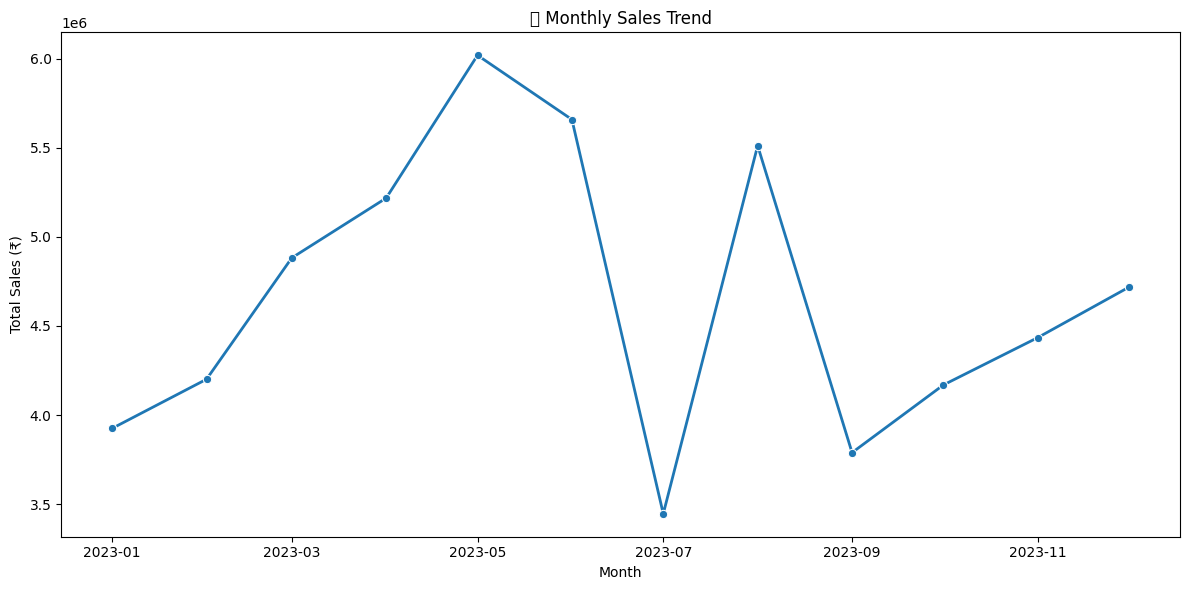

In [80]:
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('YearMonth')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='NetAmount', marker='o', linewidth=2)
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.savefig('Sales Per Month.jpg')
plt.tight_layout()
plt.show()